In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import random
import os

In [2]:
#path = os.path.join(os.getcwd(),"data","train_data.parquet")
path = "train_data.parquet"
df =  pd.read_parquet(path, engine='pyarrow')
len(df)

2812490

In [3]:
df["ther_area"].replace(["A","B","C","D","G","H","J","L","M","N","P","R","S","V"],[1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
df["ther_area"] = df["ther_area"].astype(float).fillna(0.0)

In [4]:
df["main_channel"].replace(["RETAIL","HOSPITAL","COMBINED","OTHERS"],[1,2,3,4], inplace= True)
df["main_channel"] = df["main_channel"].astype(float).fillna(0.0)

In [5]:
df["brandID"] = df["brand"].replace(df["brand"].unique(), range(1,259))
df["countryID"] = df["country"].replace(df["country"].unique(),range(1,31))

In [6]:
df["hospital_rate"].replace(np.nan, 0.0, inplace=True)
df["date"] = df["date"].astype("int64")

In [7]:
brand = df["brand"]
del df["brand"]
country = df["country"]
del df["country"]
brandID = df["brandID"]
del df["brandID"]
countryID = df["countryID"]
del df["countryID"]
date = df["date"]
del df["date"]
df.columns

Index(['phase', 'dayweek', 'month', 'wd_perc', 'ther_area', 'hospital_rate',
       'n_nwd_bef', 'n_nwd_aft', 'n_weekday_0', 'n_weekday_1', 'n_weekday_2',
       'n_weekday_3', 'n_weekday_4', 'wd', 'wd_left', 'monthly',
       'main_channel'],
      dtype='object')

In [8]:
forest = IsolationForest(n_estimators= 45, contamination = float(0.05), random_state = 42, warm_start= True)
forest.fit(df)

prediction = forest.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [9]:
outliers = pd.Series(prediction)
soma = outliers.value_counts().sum()
outlierNum = outliers.value_counts()[-1]
print(outlierNum/soma)

0.05000017777840988


In [10]:
pca = PCA(n_components = 2)
transform = pca.fit_transform(df)

In [11]:
pca.explained_variance_ratio_

array([0.48123589, 0.24827786])

In [12]:
X = []
Y = []
for i in transform:
  X.append(i[0])
  Y.append(i[1])


In [13]:
dfPlot = pd.DataFrame({"X":X,"Y":Y,"outlier":outliers})

<Axes: xlabel='X', ylabel='Y'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


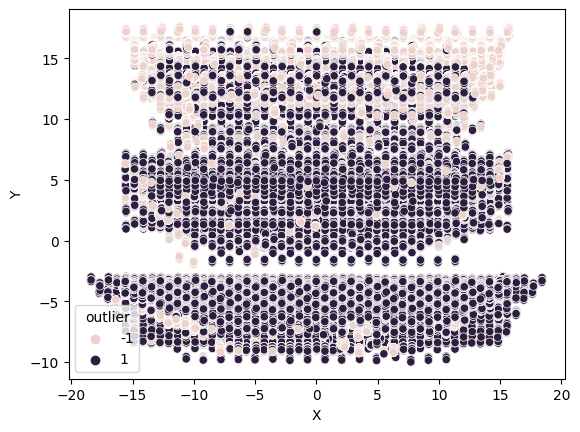

In [14]:
sns.scatterplot(data = dfPlot, x = dfPlot["X"],y = dfPlot["Y"],hue = dfPlot["outlier"])

In [15]:
dfParaquet = pd.DataFrame({"brand":brandID,"country":countryID,"phase":df["phase"],"dayweek":df["dayweek"],"month":df["month"],"wd_perc":df["wd_perc"],"ther_area":df["ther_area"],"hospital_rate":df["hospital_rate"],"n_nwd_bef":df["n_nwd_bef"],"n_nwd_aft":df["n_nwd_aft"],"n_weekday_0":df['n_weekday_0'],'n_weekday_1':df["n_weekday_1"],'n_weekday_2':df["n_weekday_2"],'n_weekday_3':df["n_weekday_3"],'n_weekday_4':df['n_weekday_4'],"date":date,"wd":df["wd"],"wd_left":df["wd_left"],"monthly":df["monthly"],"main_channel":df["main_channel"],"outlier":prediction})

In [16]:
dfParaquet["outlier"].value_counts()

 1    2671865
-1     140625
Name: outlier, dtype: int64

In [17]:
dfParaquet = dfParaquet[dfParaquet['outlier'] != -1]

In [18]:
del dfParaquet["outlier"]

In [19]:
dfParaquet

,brand,country,phase,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,1,1,0.006284,2.0,1.0,0.045455,0.0,0.0,4.0,0.0,4,4,5,5,4,1357084800000000000,1,21,0.008092,0.0
1,1,1,0.123459,3.0,1.0,0.090909,0.0,0.0,0.0,0.0,4,4,5,5,4,1357171200000000000,2,20,0.008092,0.0
2,1,1,0.055607,4.0,1.0,0.136364,0.0,0.0,0.0,2.0,4,4,5,5,4,1357257600000000000,3,19,0.008092,0.0
3,1,1,0.032148,0.0,1.0,0.181818,0.0,0.0,2.0,0.0,4,4,5,5,4,1357516800000000000,4,18,0.008092,0.0
4,1,1,0.097054,1.0,1.0,0.227273,0.0,0.0,0.0,0.0,4,4,5,5,4,1357603200000000000,5,17,0.008092,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525877,110,30,0.010716,0.0,9.0,0.818182,9.0,0.0,2.0,0.0,4,4,4,5,5,1474848000000000000,18,4,0.010540,0.0
3525878,110,30,0.042210,1.0,9.0,0.863636,9.0,0.0,0.0,0.0,4,4,4,5,5,1474934400000000000,19,3,0.010540,0.0
3525879,110,30,0.051639,2.0,9.0,0.909091,9.0,0.0,0.0,0.0,4,4,4,5,5,1475020800000000000,20,2,0.010540,0.0
3525880,110,30,0.065464,3.0,9.0,0.954545,9.0,0.0,0.0,0.0,4,4,4,5,5,1475107200000000000,21,1,0.010540,0.0


In [20]:
dfParaquet.to_parquet('prepared_dataset.parquet', index=False)